In [1]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow

In [2]:
model = keras.Sequential()                         # using the add method to create a sequential model
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [3]:
model.weights               # At this point the model isn't built yet, so no wights have been created

[]

In [4]:
model.build(input_shape=(None, 3))      # now you can retrieve the model's weight
#model.weights[:1]

In [5]:
# displaying the content of the model via summary() method
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

The model is named "sequential_1", we can name model and even layers in keras

In [6]:
model = keras.Sequential(name='my_example_model')
model.add(layers.Dense(64, activation='relu', name='my_first_layer'))
model.add(layers.Dense(10, activation='softmax', name='my_second_layer'))

model.build((None, 3))
model.summary()

Model: "my_example_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_first_layer (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ my_second_layer (Dense)         │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

Since you cant print summary until the model is built, lets build the sequential on the fly via the input class:

In [7]:
model = keras.Sequential()
model.add(keras.Input(shape=(3,)))     #shape must be the shape of each sample, not the shape of the batch
model.add(layers.Dense(64, activation='relu'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 256 (1.00 KB)

 Trainable params: 256 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

we can follow up how the model changes by using the summary() method as we add more layers. This is used in debugging workflow

In [8]:
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

## exploring the functional API
lets start with a simple example:

In [9]:
inputs = keras.Input(shape=(3,), name="my_input")   # we start by declaring an input, this holds info about shape and dtype of the data
features = layers.Dense(64,activation='relu')(inputs)  # this returns new symbolic tensor with updated shape and dtype information
outputs = layers.Dense(10, activation='softmax')(features) # Here, we are obtaining the output
model = keras.Model(inputs=inputs, outputs=outputs)   # we instantiate the model by specifying its inputs and outputs in the model constructor

In [10]:
inputs

<KerasTensor shape=(None, 3), dtype=float32, sparse=False, ragged=False, name=my_input>

In [11]:
features

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_10>

In [12]:
outputs

<KerasTensor shape=(None, 10), dtype=float32, sparse=False, ragged=False, name=keras_tensor_11>

In [13]:
model.summary()      # getting the information about the model

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ my_input (InputLayer)           │ (None, 3)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 906 (3.54 KB)

 Trainable params: 906 (3.54 KB)

 Non-trainable params: 0 (0.00 B)

#### Multi-Input, Multi-Output Models
Lets try building systems to rank customers support tickets by priority and route them to the approprite department.

SAY, the model has three inputs:

(1) the title of the tickets(text input)

(2) the text body of the ticket(text input)

(3) Any tags added by the user(categorical input, assumed here to be one hot encode)

And has two Outputs:

(1)The priority score of the ticket, a scaler between 0 and 1(sigmoid output)

(2) the Department that should handle the tickets(a softmax over the set of departments)

Lets build the model !

In [14]:
vocabulary_size = 10000
num_tags = 100
num_departments = 4

In [15]:
#defining model inputs
title = keras.Input(shape=(vocabulary_size,), name='title')
text_body = keras.Input(shape=(vocabulary_size,), name='text_body')
tags = keras.Input(shape=(num_tags,), name='tags')

features = layers.concatenate([title, text_body, tags])   #combining input features into a single tensor,features. concatenation is along the last axis
features = layers.Dense(64, activation='relu')(features)    #applying an intermediate layer to recombine input features into richer representations

# defining model outputs
priority = layers.Dense(1, activation='sigmoid', name='priority')(features)
department = layers.Dense(num_departments, activation='softmax', name='department')(features)

#creating the model
model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department])

In [16]:
features.shape, priority.shape, department.shape

((None, 64), (None, 1), (None, 4))

In [17]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ title (InputLayer)  │ (None, 10000)     │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ text_body           │ (None, 10000)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ tags (InputLayer)   │ (None, 100)       │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 20100)     │          0 │ title[0][0],      │
│ (Concatenate)       │                   │            │ text_body[0][0],  │
│                     │                   │            │ tags[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 64)        │  1,286,464 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ priority (Dense)    │ (None, 1)         │         65 │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ department (Dense)  │ (None, 4)         │        260 │ dense_6[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,286,789 (4.91 MB)

 Trainable params: 1,286,789 (4.91 MB)

 Non-trainable params: 0 (0.00 B)

TRAINING A MULTI-INPUT, MULTI-OUTPUT MODEL

lets continue :

In [18]:
import numpy as np

In [19]:
num_samples = 1280   # data points

In [20]:
# Dummy input data
title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))

# Dummy targets data
priority_data = np.random.random(size=(num_samples, 1)) # returns numers >= 0 and strictly < 1
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))

model.compile(optimizer='rmsprop',
              loss=['mean_squared_error', 'categorical_crossentropy'],
              metrics=[['mean_absolute_error'],['accuracy']])

model.fit([title_data, text_body_data, tags_data],
          [priority_data, department_data],
          epochs=2)

model.evaluate([title_data, text_body_data, tags_data],
               [priority_data, department_data])

priority_preds, department_preds = model.predict([title_data, text_body_data,
                                                  tags_data])

Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - department_accuracy: 0.1490 - department_loss: 43.9039 - loss: 44.2035 - priority_loss: 0.2996 - priority_mean_absolute_error: 0.4648
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - department_accuracy: 0.2089 - department_loss: 23.2965 - loss: 23.6293 - priority_loss: 0.3327 - priority_mean_absolute_error: 0.4991
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - department_accuracy: 0.2580 - department_loss: 16.9384 - loss: 17.2704 - priority_loss: 0.3319 - priority_mean_absolute_error: 0.4979
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [21]:
department_preds[:2]

array([[1.6156720e-11, 9.8084646e-01, 1.6261602e-02, 2.8917962e-03],
       [3.6647937e-12, 9.8765206e-01, 1.0608325e-02, 1.7396008e-03]],
      dtype=float32)

We can also do the above by providing dicts of inputs and targets arrays instead of relying on the order.  This makes it easy to track what you are doing especially if inputs/outputs are many.

In [22]:
model.compile(optimizer='rmsprop',
              loss={"priority":"mean_squared_error","department":"categorical_crossentropy"},
              metrics={"priority":["mean_absolute_error"],"department":["accuracy"]})

model.fit({"title":title_data, "text_body":text_body_data, "tags":tags_data},
          {"priority":priority_data, "department":department_data}, epochs=2)

model.evaluate({"title":title_data, "text_body":text_body_data,
                "tags":tags_data},
               {"priority":priority_data, "department":department_data})

priority_pred, department_pred = model.predict({"title":title_data, "text_body":text_body_data, "tags":tags_data})

Epoch 1/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - department_accuracy: 0.2586 - department_loss: 45.5618 - loss: 45.8947 - priority_loss: 0.3329 - priority_mean_absolute_error: 0.4970
Epoch 2/2
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - department_accuracy: 0.2282 - department_loss: 44.0832 - loss: 44.4106 - priority_loss: 0.3274 - priority_mean_absolute_error: 0.4919
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - department_accuracy: 0.1379 - department_loss: 39.9286 - loss: 40.2606 - priority_loss: 0.3319 - priority_mean_absolute_error: 0.4979
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [23]:
department_preds[:2]

array([[1.6156720e-11, 9.8084646e-01, 1.6261602e-02, 2.8917962e-03],
       [3.6647937e-12, 9.8765206e-01, 1.0608325e-02, 1.7396008e-03]],
      dtype=float32)

THE POWER OF THE FUNCTIONAL API: Access to layer connectivity.

lets visualize the connectivity of the model we just defined

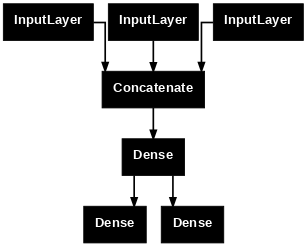

In [24]:
keras.utils.plot_model(model, "ticket_classifier.png", dpi=60)  #dpi is dot per inch. I made it smaller to fit my screen for easy visualization

To add to the above plot the input and output shape of each layer of the model, we will use the show_shapes=True. This will be very helpful in debugging

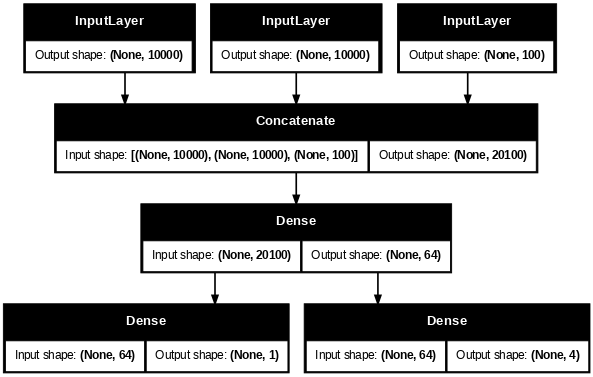

In [25]:
keras.utils.plot_model(model, "ticket_classifier_with_shape_info.png", dpi=60, show_shapes=True)

wow ! This is powerful. remember the None in the shape represent the batch size. This model will work with sample of any batch.

Also, by accessing the layer connectivity as above, we can inspect and reuse individual nodes, i.e. the layer cells in the graph. the "model.layer" model provides the list of layers that makes up the model, which can also be queried. Lets see:

In [26]:
model.layers

[<InputLayer name=title, built=True>,
 <InputLayer name=text_body, built=True>,
 <InputLayer name=tags, built=True>,
 <Concatenate name=concatenate, built=True>,
 <Dense name=dense_6, built=True>,
 <Dense name=priority, built=True>,
 <Dense name=department, built=True>]

In [27]:
# lets query
model.layers[4].input

<KerasTensor shape=(None, 20100), dtype=float32, sparse=False, ragged=False, name=keras_tensor_12>

In [28]:
model.layers[4]

<Dense name=dense_6, built=True>

In [29]:
model.layers[4].output

<KerasTensor shape=(None, 64), dtype=float32, sparse=False, ragged=False, name=keras_tensor_13>

This enables feature extraction, creating models that reuse intermediate features from another model.

Now suppose we want to add another output, say the difficulty rating of resolving issue tickets. If we do this via classification, over three categories of difficulty, we can start our model from the intermediate model as shown above. No need to start training from scratch given that we have access to the model already. lets see:

In [30]:
features = model.layers[4].output         # referencing the intermediate layers
difficulty = layers.Dense(3, activation='softmax', name='difficulty')(features)  # new output by calling it on the intermediate layer

new_model = keras.Model(inputs=[title, text_body, tags], outputs=[priority, department, difficulty])  # Our new model with three outputs

Now lets plot and see:

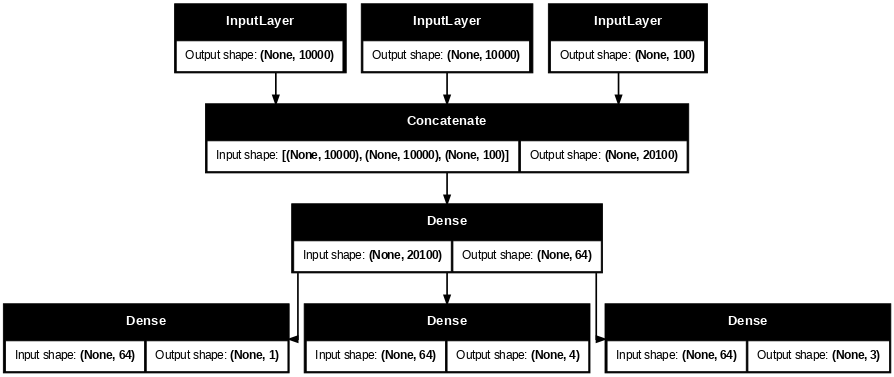

In [31]:
keras.utils.plot_model(new_model, "updated_with_three_outputs_ticket_classifier.png", dpi=60, show_shapes=True)

### Subsclassing the model
This is the most advanced.  similar to subclasssing the model class.

We will re-write the previous example as a subclassed model

## Previous example as a subclassed model

In [32]:
class CustomerTIcketModel(keras.Model):
  def __init__(self, num_departments):
    super() .__init__()    # initializes the parent keras.Model machinery so your custom....
                           # model behaves like a proper Keras model with training, saving, and layer/weight tracking.
    self.concat_layer = layers.concatenate
    self.mixing_layer = layers.Dense(64, activation='relu', name="mixing_layer")
    self.priority_scorer = layers.Dense(1, activation='sigmoid',name="priority")
    self.department_classifier = layers.Dense(num_departments, activation='softmax', name="department")

  def call(self,inputs):
    title = inputs['title']
    text_body = inputs['text_body']
    tags = inputs['tags']

    features = self.concat_layer([title, text_body, tags])
    features = self.mixing_layer(features)
    priority = self.priority_scorer(features)
    department = self.department_classifier(features)
    return priority, department

In [33]:
model = CustomerTIcketModel(num_departments=4)

In [34]:
priority, department = model({'title':title_data, 'text_body':text_body_data,
                              'tags':tags_data})

Lets compile and train this model subclass just like a sequential and or a functional model:

In [35]:
model.compile(optimizer="rmsprop",
              loss=["mean_squared_error", "categorical_crossentropy"], #the sturcture of what you pass as the loss and metrics argument must match what gets returned by the call()
              metrics=["mean_absolute_error", "accuracy"])

model.fit({"title":title_data, "text_body":text_body_data, "tags":tags_data}, # the structure of the input
          [priority_data, department_data], epochs=1)    # the structure of the target data must match what is returned by the call() method.
                                                         # Here, a list of two elements(can also make it a dictionary)
model.evaluate({"title":title_data, "text_body":text_body_data, "tags":tags_data},
               [priority_data, department_data])

priority_preds, department_preds = model.predict({"title":title_data, "text_body":text_body_data, "tags":tags_data})

40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.2150 - categorical_crossentropy_loss: 30.9572 - loss: 31.2580 - mean_absolute_error: 0.4640 - mean_squared_error_loss: 0.3008
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.2585 - categorical_crossentropy_loss: 29.1005 - loss: 29.4366 - mean_absolute_error: 0.5021 - mean_squared_error_loss: 0.3361
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


## Mixing and Matching different components

Lets use a subclassed layer or model in a functional model ::

In [36]:
class Classifier(keras.Model):
  def __init__(self, num_classes=2):
    super() .__init__()
    if num_classes == 2:
      num_units = 1
      activation = 'sigmoid'
    else:
      num_units = num_classes
      activation = 'softmax'
    self.dense = layers.Dense(num_units, activation=activation)

  def call(self, inputs):
    return self.dense(inputs)

inputs = keras.Input(shape=(3,))
features = layers.Dense(64, activation='relu')(inputs)
outputs = Classifier(num_classes=10)(features)          # since the number of classes is > 2, num_units will be 10.
model = keras.Model(inputs=inputs, outputs=outputs)

Lets try and visualize the model since it's a functional model:

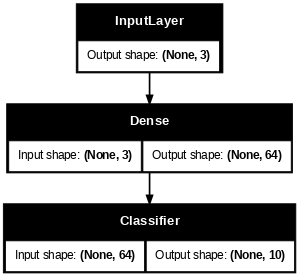

In [37]:
keras.utils.plot_model(model, "subclassed_model.png", dpi=60, show_shapes=True)

Inversely, you can use a functional model as part of a subclassed layer or model ::

In [38]:
inputs = keras.Input(shape=(64,))
outputs = layers.Dense(1, activation='sigmoid')(inputs)
binary_classifier = keras.Model(inputs=inputs, outputs=outputs)

class Mymodel(keras.Model):
  def __init__(self, num_classes=2):
    super() .__init__()
    self.dense = layers.Dense(64, activation='relu')
    self.classifier = binary_classifier

  def call(self, inputs):
      features = self.dense(inputs)
      return self.classifier(features)

model = Mymodel()

In [39]:
_ = model(tensorflow.zeros((1, 64)))   # I am building it by calling the model once, doing the forward pass by initializing the weights

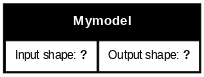

In [40]:
keras.utils.plot_model(model, "subclassed_model.png", dpi=60, show_shapes=True)

we get input and output shape with :? even after calling it once because this is still technically a subclassed model, even though part of it is a functional model.

Lets check it using the binary classifier:

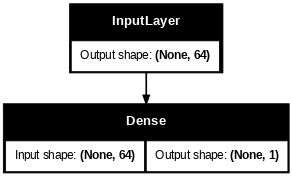

In [41]:
keras.utils.plot_model(binary_classifier, "binary_classifier_model.png", dpi=60, show_shapes=True)

# Using built-in training and evaluation loops

## The standard workflow

In [42]:
from tensorflow.keras.datasets import mnist

In [43]:
def get_mnist_model():                      # for the model to be reusable later
  inputs = keras.Input((28 * 28,))
  features = layers.Dense(512, activation='relu')(inputs)
  features = layers.Dropout(0.5)(features)                 # randomly reducing the neurons to reduce overfitting.
  outputs = layers.Dense(10, activation='softmax')(features)
  model = keras.Model(inputs, outputs)
  return model

In [44]:
# getting the data
(images, labels), (test_images, test_labels) = mnist.load_data()
images = images.reshape((60000, 28 * 28)).astype("float32") / 255
test_images = test_images.reshape((10000, 28 * 28)).astype("float32") / 255
train_images, val_images = images[10000:], images[:10000]
train_labels, val_labels = labels[10000:], labels[:10000]

In [45]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels,
          epochs=3, validation_data=(val_images, val_labels))  # validation to monitor performance on unseen data

test_metrics = model.evaluate(test_images, test_labels)  # to compute the loss and metrics on new data

predictions = model.predict(test_images)  # to generate predictions : classification categories

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8645 - loss: 0.4502 - val_accuracy: 0.9571 - val_loss: 0.1440
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9509 - loss: 0.1688 - val_accuracy: 0.9654 - val_loss: 0.1215
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9623 - loss: 0.1366 - val_accuracy: 0.9698 - val_loss: 0.1169
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9670 - loss: 0.1216
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


Lets implement a simple custom metric that measures the root mean squared error (RMSR):

In [46]:
import tensorflow as tf

In [47]:

class RootMeanSquaredError(keras.metrics.Metric):

  def __init__(self, name='rmse', **kwargs):
    super() .__init__(name=name, **kwargs)
    self.mse_sum = self.add_weight(name='mse_sum', initializer='zeros')
    self.total_samples = self.add_weight(
        name='total_samples', initializer='zeros', dtype='int32')

  def update_state(self, y_true, y_pred, sample_weight=None):
    y_true = tf.one_hot(y_true, depth=tf.shape(y_pred)[1])
    mse = tf.reduce_sum(tf.square(y_true - y_pred))
    self.mse_sum.assign_add(mse)
    num_samples = tf.shape(y_pred)[0]
    self.total_samples.assign_add(num_samples)

  def result(self):   # returns current value of the metric.
    return tf.sqrt(self.mse_sum / tf.cast(self.total_samples, tf.float32))

  def reset_state(self):
    self.mse_sum.assign(0.)
    self.total_samples.assign(0)

Lets test our metrics.

In [48]:
model = get_mnist_model()

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy', RootMeanSquaredError()])

model.fit(train_images, train_labels, epochs=3, validation_data=(val_images, val_labels))

test_metrics = model.evaluate(test_images, test_labels)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.8676 - loss: 0.4455 - rmse: 0.4364 - val_accuracy: 0.9594 - val_loss: 0.1441 - val_rmse: 0.2495
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9492 - loss: 0.1676 - rmse: 0.2749 - val_accuracy: 0.9676 - val_loss: 0.1175 - val_rmse: 0.2245
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9635 - loss: 0.1292 - rmse: 0.2368 - val_accuracy: 0.9715 - val_loss: 0.1042 - val_rmse: 0.2088
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9696 - loss: 0.1171 - rmse: 0.2226


## Early stopping and modelcheckpoint callbacks

Lets use callbacks argument in the fit() method:

In [49]:
callback_list = [
    keras.callbacks.EarlyStopping(
        monitor='val_accuracy',
        patience=2,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath='checkpoint_path.keras',
        monitor='val_loss',
        save_best_only=True,
    ),
]
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy',RootMeanSquaredError()])  # Adding our custom metrics to the model

model.fit(train_images, train_labels, epochs=10,
          callbacks=callback_list,
          validation_data=(val_images, val_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8610 - loss: 0.4596 - rmse: 0.4429 - val_accuracy: 0.9581 - val_loss: 0.1409 - val_rmse: 0.2494
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9518 - loss: 0.1627 - rmse: 0.2713 - val_accuracy: 0.9673 - val_loss: 0.1120 - val_rmse: 0.2211
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9623 - loss: 0.1318 - rmse: 0.2410 - val_accuracy: 0.9711 - val_loss: 0.1115 - val_rmse: 0.2124
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9665 - loss: 0.1205 - rmse: 0.2274 - val_accuracy: 0.9757 - val_loss: 0.0955 - val_rmse: 0.1946
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9720 - loss: 0.0984 - rmse: 0.2074 - val_accuracy: 0.9761 - val_loss: 0.0998 - val_rmse: 0.1936
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9757 - loss: 0.0902 - rmse: 0.1951 - val_accuracy: 0.9777 - val_loss: 0.0979 - val_rmse: 0.1887
Epoch 7/10

To save the model manually :

In [50]:
import os

In [51]:
if os.path.exists('my_checkpoint_path.keras'):
  print('model already saved. skipping saving')
else:
  model.save('my_checkpoint_path.keras')
  print('model saved successfully.')

model already saved. skipping saving


And to load the saved model, we use:

In [52]:
model = keras.models.load_model('my_checkpoint_path.keras',
                                custom_objects={"RootMeanSquaredError":RootMeanSquaredError})  #the custom object is added to be able to reload the model.
                                                                                                # this is because i included the customized metric which i did not decorate with the appropriate decorator
                                                                                                # The class should  have included @keras.saving.register_keras_serializable() decorator above it.

##Now we create the custom callback by subclassing the callback class.

Now we are going to write our custom callbacks. we are going to do this through the many transparently methods : on_epoch_* and on_batch_* called at various points during training

In [53]:
import matplotlib.pyplot as plt


In [54]:
class LossHistory(keras.callbacks.Callback):
  def on_train_begin(self, logs):    # on the begining of the training; that is once at the very start of training
    self.per_batch_losses = []       # empty list to store the loss value for each batch

  def on_batch_end(self, batch, logs):  # called after every batch during training
    self.per_batch_losses.append(logs.get('loss'))     # the logs dictionary contain metrics for this batch. Here, extracting the loss value

  def on_epoch_end(self, epoch, logs):  # at the end of the epoch
    plt.clf()                           # plotting the loss per batch during training
    plt.plot(range(len(self.per_batch_losses)), self.per_batch_losses, label='Training loss for each batch')
    plt.xlabel(f'Batch(epoch{epoch})') ; plt.ylabel('Loss')
    plt.legend()
    plt.savefig(f'plot_at_epoch_{epoch}.png')

    self.per_batch_losses = []      # This resets the losses after every epoch

Lets test drive it and see:

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.8620 - loss: 0.4602 - val_accuracy: 0.9591 - val_loss: 0.1381
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9505 - loss: 0.1635 - val_accuracy: 0.9662 - val_loss: 0.1251
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9629 - loss: 0.1361 - val_accuracy: 0.9728 - val_loss: 0.1005
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9695 - loss: 0.1092 - val_accuracy: 0.9747 - val_loss: 0.0954
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9705 - loss: 0.0997 - val_accuracy: 0.9754 - val_loss: 0.0930
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9749 - loss: 0.0886 - val_accuracy: 0.9784 - val_loss: 0.0932
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - accuracy: 0.9756 - loss: 0.0843 - val_accuracy: 0.9787 - val_loss: 0.0885
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9799 - loss: 0

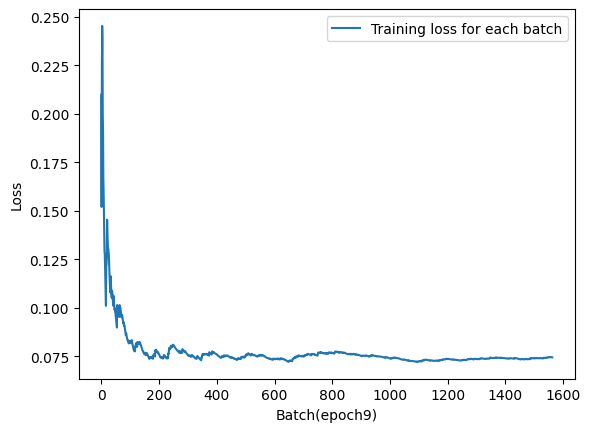

In [55]:
model = get_mnist_model()
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=10,
          callbacks=[LossHistory()],                  # this is where we use our custom callback
          validation_data=(val_images, val_labels))